<a href="https://colab.research.google.com/github/Sangwoo0707/Last/blob/main/word_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,246 kB]
Get:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main amd64 Packages [1,153 kB]
Get:13 http://a

E: Package 'python-dev' has no installation candidate


In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석

## 한글 단어 분석을 위한 패키지 준비

In [3]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [5]:
inputFileName = '/content/지구온난화_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '세계 198개국 7만여 명의 대표단이 아랍에미리트(UAE) 두바이에 모여 진행 중인 제28차 유엔기후변화협약(UNFCCC) 당사국총회(COP28)에서 <b>지구온난화</b>를 막기 위한 다양한 방안이 가시화하고 있다. 미국은 <b>지구온난화</b>... ',
  'link': 'https://www.hankyung.com/article/2023120307241',
  'org_link': 'https://www.hankyung.com/article/2023120307241',
  'pDate': '2023-12-03 18:18:00',
  'title': '&quot;<b>지구</b>촌 친환경 발전 용량 3배로 늘리겠다&quot;'},
 {'cnt': 2,
  'description': '정보기술(IT)의 급속한 발달과 함께 향후 각광받게 될 분야와 업종, 첨단 금융투자 기법, <b>지구온난화</b> 등 기후변화 대책, 미래 라이프스타일 등을 분야별로 나눠 집중 분석하고, 이를 통해 우리 주변에서 벌어지는 경제... ',
  'link': 'http://news.tf.co.kr/read/livingculture/2059312.htm',
  'org_link': 'http://news.tf.co.kr/read/livingculture/2059312.htm',
  'pDate': '2023-12-03 16:59:00',
  'title': "[TF신간] 경제기자 출신 김민구, 신간 '미래경제 지식사전' 출간"},
 {'cnt': 3,
  'description': '더불어 장수 혁명과 낮은 출산율이라는 인구구조의 변화, <b>지구 온난화</b>에 따른 기후위기와 자연재해가 심각해지면서 지금까지의 모든 시스템이 근본적으로 재편되고 있다. 18세기 산업혁명에 버금가는 이 대전환의... ',
  'link': 'https://www.incheonilbo.com/news/articleView.html?idxno=122

### 1-2. 분석할 데이터 추출

In [6]:
message = ''

for item in data:
#    if 'message' in item.keys():
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''

message #출력하여 내용 확인

'세계 198개국 7만여 명의 대표단이 아랍에미리트 UAE  두바이에 모여 진행 중인 제28차 유엔기후변화협약 UNFCCC  당사국총회 COP28 에서  b 지구온난화  b 를 막기 위한 다양한 방안이 가시화하고 있다  미국은  b 지구온난화  b     정보기술 IT 의 급속한 발달과 함께 향후 각광받게 될 분야와 업종  첨단 금융투자 기법   b 지구온난화  b  등 기후변화 대책  미래 라이프스타일 등을 분야별로 나눠 집중 분석하고  이를 통해 우리 주변에서 벌어지는 경제    더불어 장수 혁명과 낮은 출산율이라는 인구구조의 변화   b 지구 온난화  b 에 따른 기후위기와 자연재해가 심각해지면서 지금까지의 모든 시스템이 근본적으로 재편되고 있다  18세기 산업혁명에 버금가는 이 대전환의    워싱턴포스트 WP 는  급격한  b 지구 온난화  b 를 억제하는 데 도움이 될 야심 찬 계획 이라며  COP28의 가장 중요한 결과물 중 하나가 될 예상치 못한 약속 이라고 평가했다  이번 합의는 글로벌 석유업계가 온실가스    물론  quot   b 지구  b    b 온난화  b  속도를 늦추는 측면에서 지난 30년간 본 것 가운데 오늘이   b 지구  b    b 온난화  b  속도를 늦추는 측면에서 가장 영향력 있는 날이 될 것 quot 이라는 프레드 크루프 미국 환경보호기금 대표의 긍정적 평가도 있다     군에 따르면 산림환경대상은 산림의 환경기능을 증진시켜 기후변화에 대응하고  b 지구온난화  b 를 방지하는데 공헌한 공로자 또는 단체에 수여하는 상이다  완주군은 지난 2019년부터 미세먼지 농도가 높을 수밖에 없는    강연에서 김 사장은  b 지구온난화  b 로 인해  b 지구  b 촌 곳곳에서 속출하고 있는 기상이변의 심각성을 알리고  전 세계 온실가스 배출량의 31 를 차지하는 먹거리 관련 탄소중립을 위한 저탄소 식생활 실천이 반드시 필요하다고    전문가들은  b 지구 온난화  b  속도를 제어하고 기후 변동 피해를 줄이기 위해 이 합의가 실

### 1-3. 품사 태깅 : 명사 추출

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['세계',
 '개국',
 '명의',
 '대표',
 '단',
 '아랍에미리트',
 '두바이',
 '진행',
 '중인',
 '제',
 '차',
 '유엔',
 '기후변화',
 '협약',
 '사국',
 '총회',
 '지구온난화',
 '를',
 '위',
 '방안',
 '가시',
 '미국',
 '지구온난화',
 '정보기술',
 '의',
 '발달',
 '향후',
 '각광',
 '분야',
 '업종',
 '첨단',
 '금융투자',
 '기법',
 '지구온난화',
 '등',
 '기후변화',
 '대책',
 '미래',
 '라이프스타일',
 '등',
 '분야',
 '별로',
 '집중',
 '분석',
 '통해',
 '우리',
 '주변',
 '경제',
 '장수',
 '혁명',
 '출산율',
 '인구',
 '구조',
 '변화',
 '지구',
 '온난화',
 '기후',
 '위기',
 '자연재해',
 '지금',
 '모든',
 '시스템',
 '근본',
 '재',
 '고',
 '세기',
 '산업혁명',
 '버금',
 '이',
 '전환',
 '워싱턴포스트',
 '지구',
 '온난화',
 '를',
 '억제',
 '데',
 '도움',
 '야심',
 '찬',
 '계획',
 '라며',
 '의',
 '가장',
 '결과물',
 '중',
 '하나',
 '상치',
 '못',
 '약속',
 '평가',
 '이번',
 '합의',
 '글로벌',
 '유업',
 '온실가스',
 '지구',
 '온난화',
 '속도',
 '측면',
 '지난',
 '것',
 '가운데',
 '오늘이',
 '지구',
 '온난화',
 '속도',
 '측면',
 '가장',
 '영향력',
 '날',
 '것',
 '프레드',
 '크루프',
 '미국',
 '환경보호',
 '기금',
 '대표',
 '긍정',
 '평가',
 '군',
 '산림',
 '환경',
 '대상',
 '산림',
 '환경',
 '기능',
 '증진',
 '기후변화',
 '대응',
 '지구온난화',
 '를',
 '방지',
 '공헌',
 '공로',
 '단체',
 '수여',
 '상이',
 '완주군',

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [8]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'세계': 145,
         '개국': 15,
         '명의': 4,
         '대표': 59,
         '단': 3,
         '아랍에미리트': 21,
         '두바이': 32,
         '진행': 22,
         '중인': 2,
         '제': 56,
         '차': 28,
         '유엔': 81,
         '기후변화': 268,
         '협약': 56,
         '사국': 31,
         '총회': 35,
         '지구온난화': 522,
         '를': 258,
         '위': 142,
         '방안': 15,
         '가시': 3,
         '미국': 69,
         '정보기술': 3,
         '의': 191,
         '발달': 6,
         '향후': 8,
         '각광': 3,
         '분야': 25,
         '업종': 4,
         '첨단': 4,
         '금융투자': 3,
         '기법': 3,
         '등': 310,
         '대책': 11,
         '미래': 30,
         '라이프스타일': 3,
         '별로': 3,
         '집중': 5,
         '분석': 31,
         '통해': 78,
         '우리': 70,
         '주변': 26,
         '경제': 37,
         '장수': 1,
         '혁명': 2,
         '출산율': 1,
         '인구': 11,
         '구조': 3,
         '변화': 101,
         '지구': 665,
         '온난화': 505,
         '기후': 274,
       

In [9]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

지구 : 665
지구온난화 : 522
온난화 : 505
환경 : 281
기후 : 274
기후변화 : 268
대응 : 180
위해 : 166
산림 : 165
탄소 : 164
세계 : 145
영향 : 144
에너지 : 122
위기 : 120
변화 : 101
재해 : 101
상승 : 99
문제 : 98
이번 : 96
발생 : 92
중립 : 90
정부 : 86
배출 : 86
온실가스 : 83
피해 : 82
유엔 : 81
방지 : 81
사용 : 80
통해 : 78
보고서 : 75
최근 : 71
우리 : 70
미국 : 69
감소 : 64
대한 : 62
기술 : 60
대표 : 59
친환경 : 58
보험 : 58
해결 : 57
협약 : 56
회의 : 56
정책 : 56
농업인 : 55
지난 : 54
시대 : 54
연구 : 53
라며 : 52
지역 : 52
시간 : 51
기온 : 51
이산화탄소 : 51
결과 : 50
국제 : 50
각국 : 50
올해 : 50
지속 : 49
온도 : 48
하나 : 47
노력 : 47
대처 : 47
더욱 : 46


In [10]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [11]:
import matplotlib.font_manager as fm
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf"
font_name = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)
#fm._rebuild()

### 워드클라우드

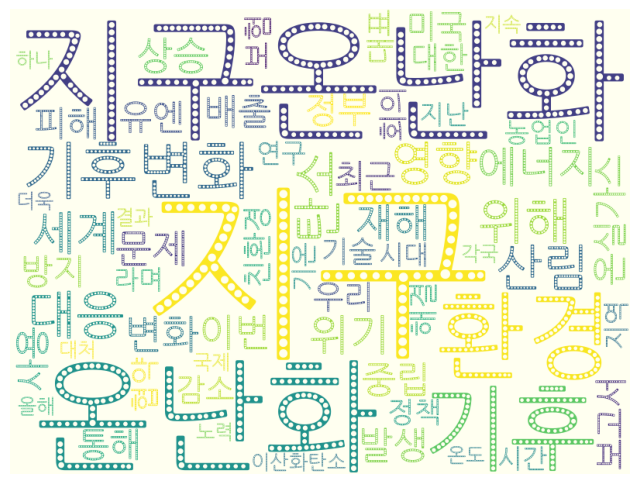

In [12]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [13]:
cloud.to_file(inputFileName + '_cloud.jpg')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd /content/drive/MyDrive/Colab Notebooks/word_test2.ipynb

[Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/word_test2.ipynb'
/content


In [22]:
!git clone https://(qkrtkddn0707@naver.com):(good)@github.com/(qkrtkddn0707@naver.com)/(Last).git

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git clone https://(qkrtkddn0707@naver.com):(good)@github.com/(qkrtkddn0707@naver.com)/(Last).git'
